In [1]:
#|default_exp app 

# Tree leaf classifier

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

In [5]:
#|export
learn = load_learner('model.pkl')

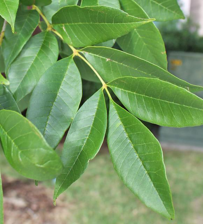

In [12]:
im = PILImage.create('images/ash.jpg')
im.thumbnail((224,224))
im

In [18]:
%time learn.predict(im)

CPU times: user 43.1 ms, sys: 22.7 ms, total: 65.8 ms
Wall time: 35.5 ms


('ash', TensorBase(0), TensorBase([0.6253, 0.0010, 0.0007, 0.0059, 0.3671]))

In [19]:
learn.dls.vocab

['ash', 'chestnut', 'ginkgo biloba', 'silver maple', 'willow oak']

In [20]:
#|export
# NOTE: Put in alphabetical order
categories = ('ash', 'chestnut', 'ginkgo biloba', 'silver maple', 'willow oak')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  # Change each probability to a float, since Gradio doesn't support Tensors or NumPy
  return dict(zip(categories, map(float, probs)))

In [21]:
classify_image(im)

{'ash': 0.6253328919410706,
 'chestnut': 0.0010375608690083027,
 'ginkgo biloba': 0.0006546207587234676,
 'silver maple': 0.005909002386033535,
 'willow oak': 0.367065966129303}

# export

In [43]:
from nbdev.export import nb_export

nb_export('app.ipynb', './')
print('Export successful')

Export successful
